In [1]:
import re # for preprocessing
import tweepy # for analysing tweets
import pickle # for pickling

In [2]:
from tweepy import OAuthHandler # oauth will authenticate client machine with twitter server using consumer keys,access tokens 

In [3]:
#intializing the keys
consumer_key ='7bV3zxiL9cwHgfEmZ7rYdnB4H'
consumer_secret ='t24Zca5nJI4axEwJ8Hn88niaTNhpjXm2PBobeg5JyjIZXkLlt3'
access_secret ='MT3xo8KkLDroE8SGCkS762jwiLdQRPHn1qURlTuxcjnkL'
access_token = '857588081809137664-ZRb0HHfeyUpPGniHqKd1ofqvjrPrzWo'


In [81]:
auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
args =['@INCIndia']
api= tweepy.API(auth,timeout=10)

In [82]:
list_tweets =[]
query =args[0]
if len(args)==1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type = 'recent').items(100):
        list_tweets.append(status.text)

In [83]:
#list_tweets

In [84]:
with open('tfidfmodel.pickle','rb') as f:
    vectorizer = pickle.load(f)

In [85]:
with open('classifier.pickle','rb') as f:
    clf = pickle.load(f)

In [86]:
clf.predict(vectorizer.transform(['you are awesome as well as shy']))

array([1])

In [87]:
#preprocess links that appear in tweets

In [88]:
total_pos = 0
total_neg =0
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s"," ",tweet)
    tweet =re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s"," ",tweet)
    tweet =re.sub(r"\s+https://t.co/[a-zA-z0-9]*$"," ",tweet)
    #for lowercase
    tweet =tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet =re.sub(r"there's","there is",tweet)
    tweet =re.sub(r"where's","where is",tweet)
    tweet =re.sub(r"it's","it is",tweet)
    tweet =re.sub(r"who's","who is",tweet)
    tweet =re.sub(r"i'm","i am",tweet)
    tweet =re.sub(r"she's","she is",tweet)
    tweet =re.sub(r"he's","he is",tweet)
    tweet =re.sub(r"they're","they are",tweet)
    tweet =re.sub(r"who're","who are",tweet)
    tweet =re.sub(r"ain't","am not",tweet)
    tweet =re.sub(r"wouldn't","would not",tweet)
    tweet =re.sub(r"can't","can not",tweet)
    tweet =re.sub(r"couldn't","could not",tweet)
    tweet =re.sub(r"won't","will not",tweet)
    # punctuations
    tweet =re.sub(r"\W"," ",tweet)
    tweet =re.sub(r"\d"," ",tweet)
    tweet =re.sub(r"s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet =re.sub(r"^[a-z]\s+"," ",tweet)
    tweet =re.sub(r"\s+"," ",tweet)
    sent=clf.predict(vectorizer.transform([tweet]).toarray())
    if sent[0] ==1:
        total_pos+=1
    else:
        total_neg+=1
    #print(tweet,":",sent)
#plot on graph


In [89]:
import matplotlib.pyplot as plt

In [90]:
import numpy as np

Text(0.5, 1.0, 'Number of Positive and Negative Tweets')

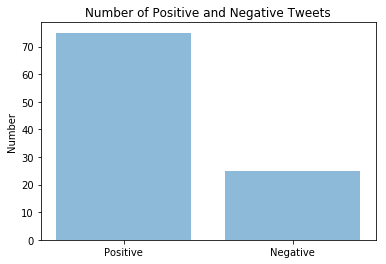

In [91]:
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))
plt.bar(y_pos,[total_pos,total_neg],alpha =0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Positive and Negative Tweets')